In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.cluster import KMeans

#### Load the date

In [3]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


#### Map the data

In [4]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English': 0, 'French': 1, 'German': 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### Select the features

In [5]:
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


#### Clustering with KMeans ####

In [9]:
kmeans = KMeans(3)

In [10]:
kmeans.fit(x)

KMeans(n_clusters=3)

#### Clustering results

In [11]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0], dtype=int32)

In [15]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters 

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


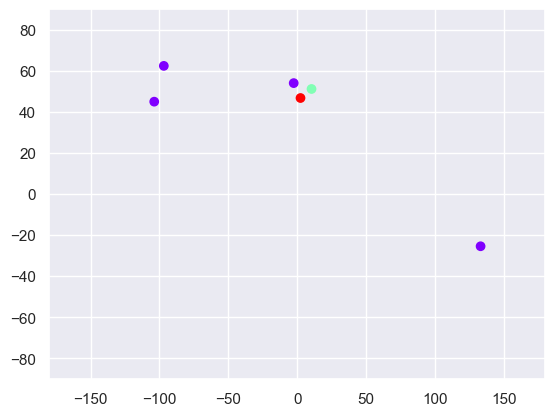

In [17]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()